In [5]:
import sys

sys.path.append("../")

import torch

from train_gpt import ImageGPT, GPTConfig

ckpt = "/home/ubuntu/simo/nano-diffusion-speedrun/logs/ckpts_2024-12-19_09-31-26_layer96_sweep_gpt_0.00048828125_True/step_6000.pt"

ckpt = torch.load(ckpt, map_location="cpu")

print(ckpt["model"])


/tmp/ipykernel_1762828/1747857740.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt, map_location="cpu")


OrderedDict([('transformer.wte.weight', tensor([[-1.1226e-01, -2.9082e-01, -4.6272e-02,  ..., -2.4268e-01,
          1.2907e-01,  3.0138e-02],
        [-2.4280e-01, -5.3617e-02, -6.1768e-02,  ...,  1.0846e-02,
          9.3263e-02, -6.4724e-02],
        [-2.0683e-01, -1.7631e-01, -1.3940e-01,  ..., -1.5582e-01,
         -7.9444e-02, -3.6367e-02],
        ...,
        [-1.1756e-04,  2.8045e-05,  1.1940e-04,  ...,  6.6481e-05,
         -4.9533e-05, -8.0489e-05],
        [ 1.8141e-04, -6.0149e-05,  1.7892e-04,  ..., -3.9775e-05,
         -1.7171e-04,  2.6727e-05],
        [-1.4213e-04,  1.3632e-04,  6.5464e-05,  ..., -1.0614e-04,
         -1.6589e-04, -3.1847e-04]])), ('transformer.h.0.attn.lamb1', tensor(0.0879)), ('transformer.h.0.attn.lamb2', tensor(0.0879)), ('transformer.h.0.attn.c_q.weight', tensor([[ 0.0156, -0.0181,  0.0036,  ...,  0.0002, -0.0188, -0.0153],
        [-0.0004, -0.0232,  0.0026,  ...,  0.0393, -0.0180,  0.0183],
        [ 0.0213,  0.0197, -0.0109,  ...,  0.0195,  0.

In [25]:
# print lambda
import re
values = []


for name, param in ckpt["model"].items():
    if "lamb" in name:
        print(name, param)
        # is lambda{i}
        i = re.search(r"lamb(\d+)", name).group(1)
        # x of h.{x}
        x = re.search(r"h\.(\d+)", name).group(1)
        values.append((f"value residual lambda {i}", int(x), param.item()))
        
    if "attn.c_proj" in name:
        print(name, param)
        # is lambda{i}
        # x of h.{x}
        x = re.search(r"h\.(\d+)", name).group(1)
        values.append(("fro norm of O layer", int(x), torch.linalg.norm(param, ord='fro').item()))


transformer.h.0.attn.lamb1 tensor(0.0879)
transformer.h.0.attn.lamb2 tensor(0.0879)
transformer.h.0.attn.c_proj.weight tensor([[ 0.0082, -0.0113,  0.0204,  ...,  0.0108,  0.0080,  0.0051],
        [ 0.0055,  0.0088,  0.0195,  ..., -0.0324, -0.0020, -0.0164],
        [ 0.0271,  0.0249,  0.0147,  ..., -0.0013, -0.0151, -0.0114],
        ...,
        [-0.0016,  0.0129,  0.0169,  ...,  0.0120, -0.0070, -0.0055],
        [-0.0155, -0.0252, -0.0173,  ...,  0.0148, -0.0030,  0.0101],
        [ 0.0014, -0.0277, -0.0113,  ..., -0.0290, -0.0033,  0.0093]])
transformer.h.1.attn.lamb1 tensor(0.1237)
transformer.h.1.attn.lamb2 tensor(0.1467)
transformer.h.1.attn.c_proj.weight tensor([[-0.0260,  0.0043, -0.0007,  ..., -0.0011, -0.0215, -0.0165],
        [-0.0514,  0.0444, -0.0133,  ..., -0.0163,  0.0245,  0.0185],
        [-0.0028,  0.0347, -0.0112,  ...,  0.0243, -0.0217,  0.0074],
        ...,
        [ 0.0169,  0.0092, -0.0185,  ...,  0.0157, -0.0135, -0.0163],
        [-0.0005, -0.0320, -0.0082,

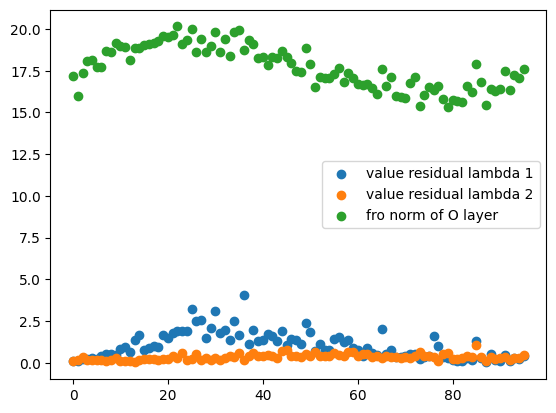

In [26]:
# plot
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(values, columns=["value_res_lambda", "x", "value"])

# color by value_res_lambda
for value_res_lambda in df["value_res_lambda"].unique():
    plt.scatter(df[df["value_res_lambda"] == value_res_lambda]["x"], df[df["value_res_lambda"] == value_res_lambda]["value"], label=f"{value_res_lambda}")
plt.legend()
plt.show()


